<a href="https://colab.research.google.com/github/ahmadalwareh/family-relationships/blob/main/family_relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyDatalog pandas

In [2]:
import pandas as pd
from pyDatalog import pyDatalog
import csv

In [3]:
data = """Ahmad,Bachar,Rafah,Male
Amjad,Bachar,Rafah,Male
Amr,Bachar,Suhair,Male
Danah,Bachar,Rafah,Female
Yazan,Hassan,Ghalia,Male
Leen,Hassan,Ghalia,Female
Dema,Faiaz,Sahar,Female
Dania,Faiaz,Sahar,Female
Tareq,Faiaz,Sahar,Male
Asmaa,Waleed,Hanan,Female
Alaa,Waleed,Hanan,Female
Firas,Waleed,Hanan,Male
Farouk,Shareef,Sameah,Male
Usaema,Saeed,Adebeh,Female
Bachar,Farouk,Usaema,Male
Sahar,Farouk,Usaema,Female
Hassan,Farouk,Usaema,Male
Hanan,Farouk,Usaema,Female
Rafah,Zuhair,Rukaieh,Female
Zoukaa,Zuhair,Rukaieh,Female
Lujain,Adnan,Zoukaa,Female
Mohammad,Adnan,Zoukaa,Male"""
family_lst = [line.split(',') for line in data.split('\n')]

In [4]:
with open("data.csv", "w", newline='') as f:
    write = csv.writer(f)
    write.writerows(family_lst)

data = pd.read_csv('data.csv', header=None)
data.columns = ['name', 'father_name', 'mother_name', 'gender']
print(data)

        name father_name mother_name  gender
0      Ahmad      Bachar       Rafah    Male
1      Amjad      Bachar       Rafah    Male
2        Amr      Bachar      Suhair    Male
3      Danah      Bachar       Rafah  Female
4      Yazan      Hassan      Ghalia    Male
5       Leen      Hassan      Ghalia  Female
6       Dema       Faiaz       Sahar  Female
7      Dania       Faiaz       Sahar  Female
8      Tareq       Faiaz       Sahar    Male
9      Asmaa      Waleed       Hanan  Female
10      Alaa      Waleed       Hanan  Female
11     Firas      Waleed       Hanan    Male
12    Farouk     Shareef      Sameah    Male
13    Usaema       Saeed      Adebeh  Female
14    Bachar      Farouk      Usaema    Male
15     Sahar      Farouk      Usaema  Female
16    Hassan      Farouk      Usaema    Male
17     Hanan      Farouk      Usaema  Female
18     Rafah      Zuhair     Rukaieh  Female
19    Zoukaa      Zuhair     Rukaieh  Female
20    Lujain       Adnan      Zoukaa  Female
21  Mohamm

In [5]:
pyDatalog.create_terms('X,Y,Z,W, parent, male, female, father_of, mother_of, son, daughter, aunt, uncle, cousin, niece, nephew, '
                      'sibling, brother, sister, mother_in_law, father_in_law, brother_in_law, sister_in_law, '
                      'spouse, grandparent, grandchild, great_grandparent, great_grandchild, half_sibling, step_parent, step_child,'
                      'step_mother, step_father, step_sister, step_brother, half_sister, half_brother, sibling_in_law')

In [6]:
for index, row in data.iterrows():
    name, father_name, mother_name, gender = row['name'], row['father_name'], row['mother_name'], row['gender']
    if gender == 'Male':
        +son(name, father_name)
        +son(name, mother_name)
        +male(name)
    else:
        +daughter(name, father_name)
        +daughter(name, mother_name)
        +female(name)


    +father_of(father_name, name)
    +mother_of(mother_name, name)

In [7]:
print(son(X, "Bachar"))
print(son(X, "Sahar"))
print(son(X, "Hassan"))
print(son(X, "Waleed"))

X    
-----
Amjad
Amr  
Ahmad
X    
-----
Tareq
X    
-----
Yazan
X    
-----
Firas


In [8]:
print(daughter(X, "Rafah"))
print(daughter(X, "Hassan"))
print(daughter(X, "Hanan"))
print(daughter(X, "Usaema"))

X    
-----
Danah
X   
----
Leen
X    
-----
Asmaa
Alaa 
X    
-----
Hanan
Sahar


In [9]:
parent(X, Y) <= father_of(X, Y)
parent(X, Y) <= mother_of(X, Y)

print("Bachar's parents are:", parent(X, "Bachar"))

print("Asmaa's parents are:", parent(X, "Asmaa"))

Bachar's parents are: X     
------
Usaema
Farouk
Asmaa's parents are: X     
------
Hanan 
Waleed


In [10]:
brother(X, Y) <= (parent(Z, X) & parent(Z, Y) & male(X) & (X != Y))
print(brother(X, "Amjad"))
print(brother(X, "Bachar"))

X    
-----
Ahmad
Amr  
X     
------
Hassan


In [11]:
sister(X, Y) <= (parent(Z, X) & parent(Z, Y) & (X != Y) & female(X))
print(sister(X, "Ahmad"))

print(sister(X, "Asmaa"))

X    
-----
Danah
X   
----
Alaa


In [12]:
sibling(X,Y) <= parent(Z, X) & parent(Z, Y) & (X != Y)

print(True if sibling("Asmaa", "Alaa") else False)
print(sibling(X, "Dema"))

True
X    
-----
Tareq
Dania


In [13]:
uncle(X, Y) <= brother(X, Z) & parent(Z, Y) & male(X)

print(uncle(X, "Danah"))

X     
------
Hassan


In [14]:
aunt(X, Y) <= sister(X, Z) & parent(Z, Y) & female(X)

print(aunt(X, "Ahmad"))

X     
------
Zoukaa
Hanan 
Sahar 


In [15]:
cousin(X, Y) <= parent(Z, X) & (sibling(W, Z) & parent(W, Y))

print(cousin(X, "Ahmad"))

X       
--------
Lujain  
Mohammad
Dema    
Dania   
Tareq   
Asmaa   
Alaa    
Firas   
Yazan   
Leen    


In [16]:
niece(X, Y) <= daughter(X, Z) & sibling(Z, Y)

nephew(X, Y) <= son(X, Z) & sibling(Z, Y)

print(niece(X, "Bachar"))

print(nephew(Y, "Bachar"))

X    
-----
Alaa 
Asmaa
Dania
Dema 
Leen 
Y    
-----
Firas
Tareq
Yazan


In [17]:
+spouse('Bachar', 'Rafah')
+spouse('Hassan', 'Ghalia')
+spouse('Farouk', 'Usaema')
+spouse('Zuhair', 'Rukaieh')
+spouse('Adnan', 'Zoukaa')

mother_in_law(X, Y) <= mother_of(X, Z) & spouse(Z, Y)
brother_in_law(X, Y) <= brother(X, Z) & spouse(Z, Y)

print(mother_in_law(X, "Rafah"))
print(brother_in_law(Y, "Ghalia"))

X     
------
Usaema
Y     
------
Bachar


In [18]:
step_mother(X, Y) <= mother_of(X, Z) & father_of(W, Y) & spouse(W, Z) & (X != Y)
step_father(X, Y) <= father_of(X, Z) & mother_of(W, Y) & spouse(W, Z) & (X != Y)
step_sister(X, Y) <= sister(X, Z) & (step_mother(Z, Y) or step_father(Z, Y))
step_brother(X, Y) <= brother(X, Z) & (step_mother(Z, Y) or step_father(Z, Y))

print(True if step_brother(X, "Ahmad") else False)

False


In [19]:
grandparent(X, Y) <= parent(X, Z) & parent(Z, Y)

great_grandparent(X, Y) <= parent(X, Z) & grandparent(Z, Y)

grandchild(X, Y) <= parent(Y, Z) & parent(Z, X)

print(grandparent(X, "Danah"))
print(grandchild(Y, "Rukaieh"))

X      
-------
Rukaieh
Usaema 
Zuhair 
Farouk 
Y       
--------
Danah   
Amjad   
Ahmad   
Mohammad
Lujain  


In [24]:
half_sister(X, Y) <= daughter(X, Z) & parent(Z, X)
half_brother(X, Y) <= son(X, Z) & parent(Z, Y) & (X != Y)


print(half_brother(X, "Amr"))

X    
-----
Amjad
Ahmad


In [21]:
sister_in_law(X, Y) <= spouse(Z, Y) & sister(X, Z)
brother_in_law(X, Y) <= spouse(Z, Y) & brother(X, Z)

print(sister_in_law(X, "Rafah"))
print(brother_in_law(X, "Ghalia"))

X    
-----
Hanan
Sahar
X     
------
Bachar


In [22]:
!pip install matplotlib networkx


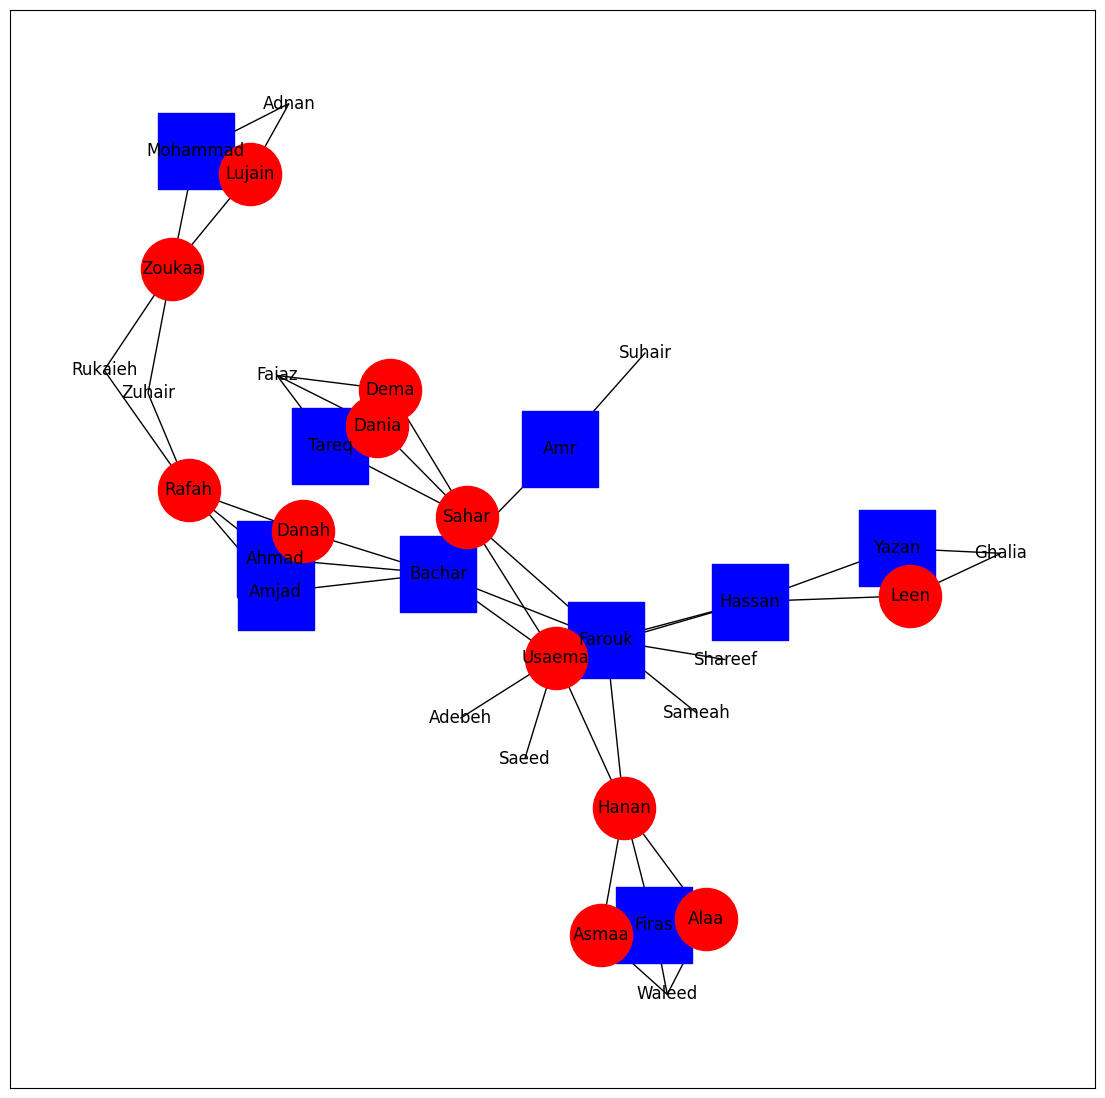

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Create a pandas DataFrame
data = pd.DataFrame({
    'name': ['Ahmad', 'Amjad', 'Amr', 'Danah', 'Yazan', 'Leen', 'Dema', 'Dania', 'Tareq', 'Asmaa', 'Alaa', 'Firas',
             'Farouk', 'Usaema', 'Bachar', 'Sahar', 'Hassan', 'Hanan', 'Rafah', 'Zoukaa', 'Lujain', 'Mohammad'],
    'father_name': ['Bachar', 'Bachar', 'Bachar', 'Bachar', 'Hassan', 'Hassan', 'Faiaz', 'Faiaz', 'Faiaz', 'Waleed',
                    'Waleed', 'Waleed', 'Shareef', 'Saeed', 'Farouk', 'Farouk', 'Farouk', 'Farouk', 'Zuhair', 'Zuhair',
                    'Adnan', 'Adnan'],
    'mother_name': ['Rafah', 'Rafah', 'Suhair', 'Rafah', 'Ghalia', 'Ghalia', 'Sahar', 'Sahar', 'Sahar', 'Hanan', 'Hanan',
                    'Hanan', 'Sameah', 'Adebeh', 'Usaema', 'Usaema', 'Usaema', 'Usaema', 'Rukaieh', 'Rukaieh', 'Zoukaa',
                    'Zoukaa'],
    'gender': ['Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
               'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male']
})

# Create a graph
G = nx.Graph()

# Add nodes with the person names
for name in data['name']:
    G.add_node(name)

# Add edges between parents and children
for _, row in data.iterrows():
    G.add_edge(row['name'], row['father_name'])
    G.add_edge(row['name'], row['mother_name'])

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(14,14))

# Draw male nodes in blue, female nodes in red
male = [name for name in data['name'][data['gender'] == 'Male']]
female = [name for name in data['name'][data['gender'] == 'Female']]
nx.draw_networkx_nodes(G, pos, nodelist=male, node_color='blue', node_shape='s', node_size=3000)
nx.draw_networkx_nodes(G, pos, nodelist=female, node_color='red', node_shape='o', node_size=2000)

# Draw edges
nx.draw_networkx_edges(G, pos)

# Add labels
nx.draw_networkx_labels(G, pos)

plt.show()
